In [80]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [81]:
#import data
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [82]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [83]:
loan_df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

## Data Wrangling

In [84]:
# I do not need all columns, so just select the columns that I am interested in the further analyses
loan_df1 = loan_df[['ListingKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','EmploymentStatus','CreditGrade','CreditScoreRangeLower','CreditScoreRangeUpper',
                   'StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount','Recommendations','LoanOriginationDate','DebtToIncomeRatio','LoanOriginationQuarter','CurrentCreditLines','IncomeRange'
                   ,'LP_InterestandFees','LP_ServiceFees','CurrentCreditLines','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','BankcardUtilization','AvailableBankcardCredit','TotalProsperLoans']]

In [85]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
ListingKey                   113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
CreditGrade                  28953 non-null object
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
LoanOriginalAmount           113937 non-null int64
Recommendations              113937 non-null int64
LoanOriginationDate          113937 non-null object
DebtT

In [86]:
loan_df1.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [87]:
## Add a new column of loan status that includes two status: Normal and High Risk
loan_df1.LoanStatus.value_counts()
def loanstatus (l):
    if l == 'Current':
        s = 'Normal'
    elif l == 'FinalPaymentInProgress':
        s = 'Normal'
    elif l == 'Past Due (1-15 days)':
        s = 'Normal'
    elif l == 'Past Due (16-30 days)':
        s = 'Normal'
    elif l == 'Cacelled':
        s = 'Normal'
    elif l == 'Completed':
        s = 'Normal'
    else:
        s = 'High Risk'
    return s
loan_df1['LoanStatus_New']=loan_df1['LoanStatus'].apply(loanstatus)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
loan_df1.CreditScoreRangeUpper.value_counts()

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

In [89]:
def loanstage (d):
    if d >= '2009-07-01':
        t = 'After July 2009'
    else:
        t = 'Before July 2009'
    return t
loan_df1['Stage']=loan_df1['LoanOriginationDate'].apply(loanstage)
loan_df1.Stage.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


After July 2009     84984
Before July 2009    28953
Name: Stage, dtype: int64

In [90]:
def loan_date (q):
    if '2005-01' in q:
        lq = 'Jan 2005'
    elif '2005-02' in q:
        lq = 'Feb 2005'
    elif '2005-03' in q:
        lq = 'Mar 2005'
    elif '2005-04' in q:
        lq = 'Apr 2005'
    elif '2005-05' in q:
        lq = 'May 2005'
    elif '2005-06' in q:
        lq = 'June 2005'
    elif '2005-07' in q:
        lq = 'July 2005'
    elif '2005-08' in q:
        lq = 'Aug 2005'
    elif '2005-09' in q:
        lq = 'Sept 2005'
    elif '2005-10' in q:
        lq = 'Oct 2005'
    elif '2005-11' in q:
        lq = 'Nov 2005'
    elif '2005-12' in q:
        lq = 'Dec 2005'
    elif '2006-01' in q:
        lq = 'Jan 2006'
    elif '2006-02' in q:
        lq = 'Feb 2006'
    elif '2006-03' in q:
        lq = 'Mar 2006'
    elif '2006-04' in q:
        lq = 'Apr 2006'
    elif '2006-05' in q:
        lq = 'May 2006'
    elif '2006-06' in q:
        lq = 'June 2006'
    elif '2006-07' in q:
        lq = 'July 2006'
    elif '2006-08' in q:
        lq = 'Aug 2006'
    elif '2006-09' in q:
        lq = 'Sept 2006'
    elif '2006-10' in q:
        lq = 'Oct 2006'
    elif '2006-11' in q:
        lq = 'Nov 2006'
    elif '2006-12' in q:
        lq = 'Dec 2006'
    elif '2007-01' in q:
        lq = 'Jan 2007'
    elif '2007-02' in q:
        lq = 'Feb 2007'
    elif '2007-03' in q:
        lq = 'Mar 2007'
    elif '2007-04' in q:
        lq = 'Apr 2007'
    elif '2007-05' in q:
        lq = 'May 2007'
    elif '2007-06' in q:
        lq = 'June 2007'
    elif '2007-07' in q:
        lq = 'July 2007'
    elif '2007-08' in q:
        lq = 'Aug 2007'
    elif '2007-09' in q:
        lq = 'Sept 2007'
    elif '2007-10' in q:
        lq = 'Oct 2007'
    elif '2007-11' in q:
        lq = 'Nov 2007'
    elif '2007-12' in q:
        lq = 'Dec 2007'
    elif '2008-01' in q:
        lq = 'Jan 2008'
    elif '2008-02' in q:
        lq = 'Feb 2008'
    elif '2008-03' in q:
        lq = 'Mar 2008'
    elif '2008-04' in q:
        lq = 'Apr 2008'
    elif '2008-05' in q:
        lq = 'May 2008'
    elif '2008-06' in q:
        lq = 'June 2008'
    elif '2008-07' in q:
        lq = 'July 2008'
    elif '2008-08' in q:
        lq = 'Aug 2008'
    elif '2008-09' in q:
        lq = 'Sept 2008'
    elif '2008-10' in q:
        lq = 'Oct 2008'
    elif '2008-11' in q:
        lq = 'Nov 2008'
    elif '2008-12' in q:
        lq = 'Dec 2008'
    elif '2009-01' in q:
        lq = 'Jan 2009'
    elif '2009-02' in q:
        lq = 'Feb 2009'
    elif '2009-03' in q:
        lq = 'Mar 2009'
    elif '2009-04' in q:
        lq = 'Apr 2009'
    elif '2009-05' in q:
        lq = 'May 2009'
    elif '2009-06' in q:
        lq = 'June 2009'
    elif '2009-07' in q:
        lq = 'July 2009'
    elif '2009-08' in q:
        lq = 'Aug 2009'
    elif '2009-09' in q:
        lq = 'Sept 2009'
    elif '2009-10' in q:
        lq = 'Oct 2009'
    elif '2009-11' in q:
        lq = 'Nov 2009'
    elif '2009-12' in q:
        lq = 'Dec 2009'
    elif '2010-01' in q:
        lq = 'Jan 2010'
    elif '2010-02' in q:
        lq = 'Feb 2010'
    elif '2010-03' in q:
        lq = 'Mar 2010'
    elif '2010-04' in q:
        lq = 'Apr 2010'
    elif '2010-05' in q:
        lq = 'May 2010'
    elif '2010-06' in q:
        lq = 'June 2010'
    elif '2010-07' in q:
        lq = 'July 2010'
    elif '2010-08' in q:
        lq = 'Aug 2010'
    elif '2010-09' in q:
        lq = 'Sept 2010'
    elif '2010-10' in q:
        lq = 'Oct 2010'
    elif '2010-11' in q:
        lq = 'Nov 2010'
    elif '2010-12' in q:
        lq = 'Dec 2010'
    elif '2011-01' in q:
        lq = 'Jan 2011'
    elif '2011-02' in q:
        lq = 'Feb 2011'
    elif '2011-03' in q:
        lq = 'Mar 2011'
    elif '2011-04' in q:
        lq = 'Apr 2011'
    elif '2011-05' in q:
        lq = 'May 2011'
    elif '2011-06' in q:
        lq = 'June 2011'
    elif '2011-07' in q:
        lq = 'July 2011'
    elif '2011-08' in q:
        lq = 'Aug 2011'
    elif '2011-09' in q:
        lq = 'Sept 2011'
    elif '2011-10' in q:
        lq = 'Oct 2011'
    elif '2011-11' in q:
        lq = 'Nov 2011'
    elif '2011-12' in q:
        lq = 'Dec 2011'
    elif '2012-01' in q:
        lq = 'Jan 2012'
    elif '2012-02' in q:
        lq = 'Feb 2012'
    elif '2012-03' in q:
        lq = 'Mar 2012'
    elif '2012-04' in q:
        lq = 'Apr 2012'
    elif '2012-05' in q:
        lq = 'May 2012'
    elif '2012-06' in q:
        lq = 'June 2012'
    elif '2012-07' in q:
        lq = 'July 2012'
    elif '2012-08' in q:
        lq = 'Aug 2012'
    elif '2012-09' in q:
        lq = 'Sept 2012'
    elif '2012-10' in q:
        lq = 'Oct 2012'
    elif '2012-11' in q:
        lq = 'Nov 2012'
    elif '2012-12' in q:
        lq = 'Dec 2012'
    elif '2013-01' in q:
        lq = 'Jan 2013'
    elif '2013-02' in q:
        lq = 'Feb 2013'
    elif '2013-03' in q:
        lq = 'Mar 2013'
    elif '2013-04' in q:
        lq = 'Apr 2013'
    elif '2013-05' in q:
        lq = 'May 2013'
    elif '2013-06' in q:
        lq = 'June 2013'
    elif '2013-07' in q:
        lq = 'July 2013'
    elif '2013-08' in q:
        lq = 'Aug 2013'
    elif '2013-09' in q:
        lq = 'Sept 2013'
    elif '2013-10' in q:
        lq = 'Oct 2013'
    elif '2013-11' in q:
        lq = 'Nov 2013'
    elif '2013-12' in q:
        lq = 'Dec 2013'
    elif '2014-01' in q:
        lq = 'Jan 2014'
    elif '2014-02' in q:
        lq = 'Feb 2014'
    elif '2014-03' in q:
        lq = 'Mar 2014'
    elif '2014-04' in q:
        lq = 'Apr 2014'
    elif '2014-05' in q:
        lq = 'May 2014'
    elif '2014-06' in q:
        lq = 'June 2014'
    elif '2014-07' in q:
        lq = 'July 2014'
    elif '2014-08' in q:
        lq = 'Aug 2014'
    elif '2014-09' in q:
        lq = 'Sept 2014'
    elif '2014-10' in q:
        lq = 'Oct 2014'
    elif '2014-11' in q:
        lq = 'Nov 2014'
    elif '2014-12' in q:
        lq = 'Dec 2014'
    return lq
loan_df1['Loan_Date']=loan_df1['LoanOriginationDate'].apply(loan_date)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
# Define borrower new borrower or old borrower
loan_df1.TotalProsperLoans.unique()
def customer(c):
    if c > 0:
        c = 'Old borrower'
    else:
        c = 'New borrower'
    return c
loan_df1['Borrower']=loan_df1['TotalProsperLoans'].apply(customer)
loan_df1.Borrower.unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['New borrower', 'Old borrower'], dtype=object)

In [92]:
def loan_type (t):
    if t == 0:
        tp = 'Not available'
    elif t == 1:
        tp = 'Debt Consolidation'
    elif t == 2:
        tp = 'Home Improvement'
    elif t == 3:
        tp = 'Business'
    elif t ==4:
        tp = 'Personal Loan'
    elif t ==5:
        tp = 'Student Use'
    elif t == 6:
        tp = 'Auto'
    elif t ==7:
        tp = 'Other'
    elif t == 8:
        tp = 'Baby&Adoption'
    elif t == 9 :
        tp = 'Boat'
    elif t == 10:
        tp = 'Cosmetic'
    elif t == 11:
        tp = 'Engagement'
    elif t == 12:
        tp = 'Green Loans'
    elif t == 13:
        tp = 'Househod Expression'
    elif t == 14:
        tp = 'Large Purchase'
    elif t == 15:
        tp = 'Medical/Dental'
    elif t == 16:
        tp = 'Motocycle'
    elif t == 17:
        tp = 'RV'
    elif t == 18:
        tp = 'Taxes'
    elif t == 19:
        tp = 'Vacation'
    elif t == 20:
        tp = 'Wedding'
    return tp
loan_df1['loantype']=loan_df1['ListingCategory (numeric)'].apply(loan_type)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


##  Univaraite analysis


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


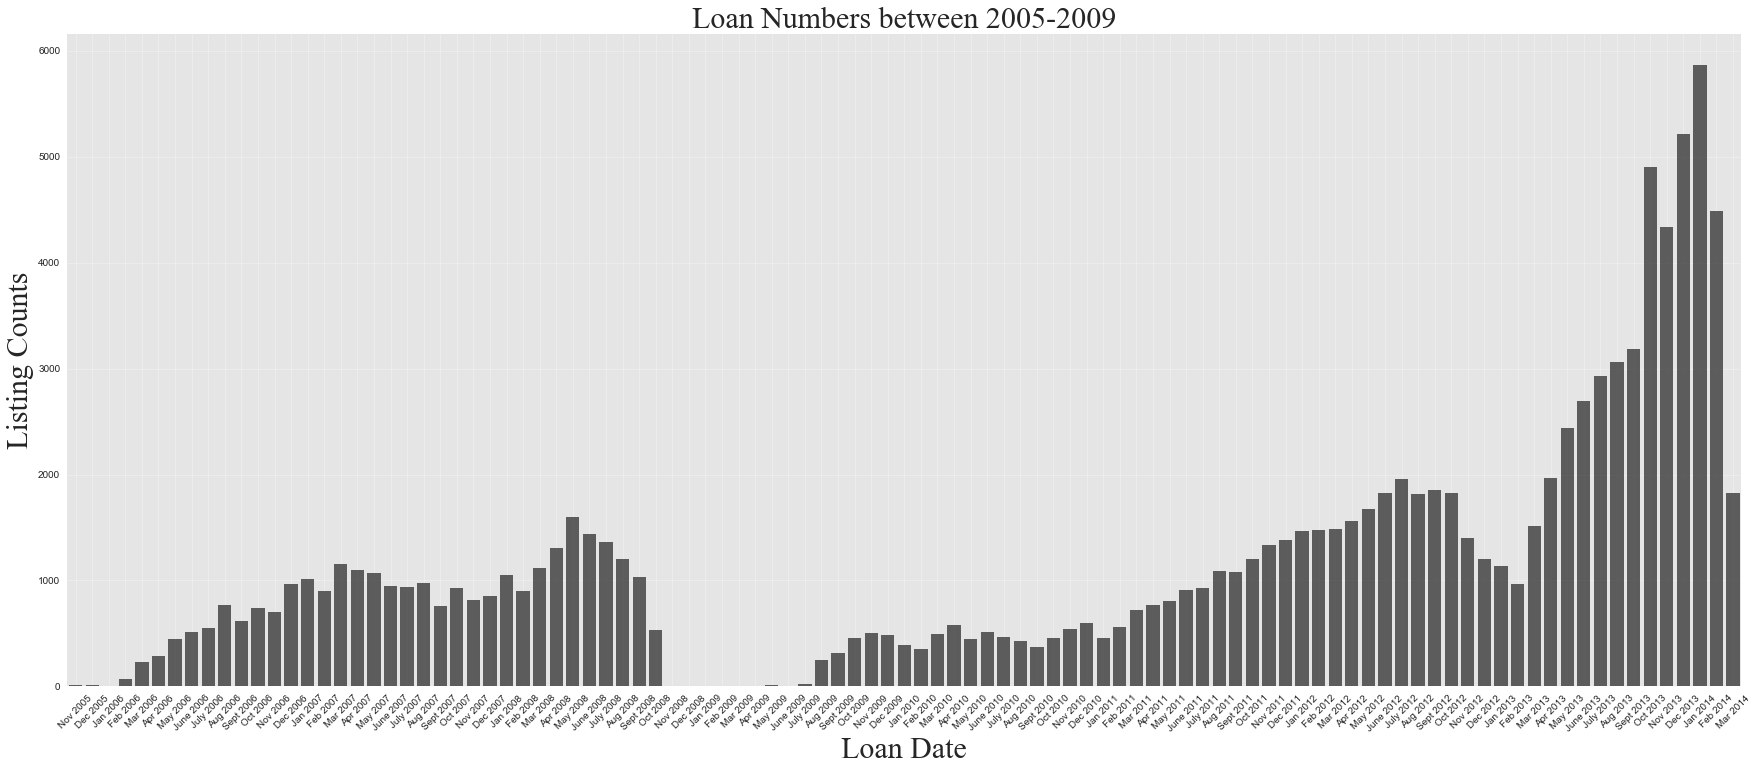

In [93]:
## reorganie the date information
date_df=loan_df1[['Loan_Date','Stage']]
date_order = ['Nov 2005','Dec 2005','Jan 2006','Feb 2006','Mar 2006','Apr 2006','May 2006','June 2006','July 2006',
              'Aug 2006','Sept 2006','Oct 2006','Nov 2006','Dec 2006','Jan 2007','Feb 2007','Mar 2007','Apr 2007','May 2007','June 2007','July 2007',
              'Aug 2007','Sept 2007','Oct 2007','Nov 2007','Dec 2007','Jan 2008','Feb 2008','Mar 2008','Apr 2008','May 2008','June 2008','July 2008',
              'Aug 2008','Sept 2008','Oct 2008','Nov 2008','Dec 2008','Jan 2009','Feb 2009','Mar 2009','Apr 2009','May 2009','June 2009','July 2009',
              'Aug 2009','Sept 2009','Oct 2009','Nov 2009','Dec 2009','Jan 2010','Feb 2010','Mar 2010','Apr 2010','May 2010','June 2010','July 2010',
              'Aug 2010','Sept 2010','Oct 2010','Nov 2010','Dec 2010','Jan 2011','Feb 2011','Mar 2011','Apr 2011','May 2011','June 2011','July 2011',
              'Aug 2011','Sept 2011','Oct 2011','Nov 2011','Dec 2011','Jan 2012','Feb 2012','Mar 2012','Apr 2012','May 2012','June 2012','July 2012',
              'Aug 2012','Sept 2012','Oct 2012','Nov 2012','Dec 2012','Jan 2013','Feb 2013','Mar 2013','Apr 2013','May 2013','June 2013','July 2013',
              'Aug 2013','Sept 2013','Oct 2013','Nov 2013','Dec 2013','Jan 2014','Feb 2014','Mar 2014']
date_var = pd.api.types.CategoricalDtype(ordered = True, categories = date_order)
date_df['Loan_Date']=date_df['Loan_Date'].astype(date_var)
plt.figure(figsize=(30,12))
sb.countplot(data = date_df,x='Loan_Date', color = 'k',alpha = 0.6)
font1={'family':'Times New Roman',
      'weight':'normal',
      'size':30}
font2={'family':'Times New Roman',
      'weight':'normal',
      'size':20}
plt.xlabel('Loan Date',font1)
plt.ylabel('Listing Counts',font1)
plt.xticks(rotation = 45)
plt.tick_params(font2)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title ('Loan Numbers between 2005-2009',font1)
plt.show();

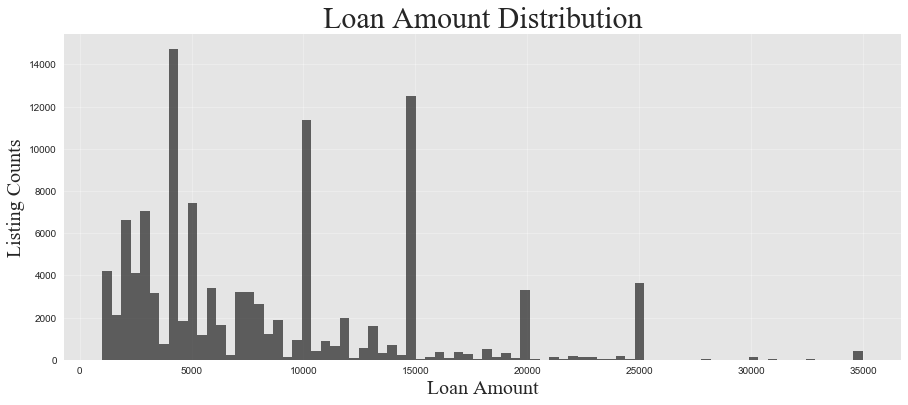

In [94]:
plt.figure(figsize=(15,6))
loan_amount = loan_df1[['LoanOriginalAmount','Loan_Date','Stage']]
plt.hist(loan_amount['LoanOriginalAmount'],bins = 80, color = 'k',alpha = 0.6)
plt.xlabel('Loan Amount',font2)
plt.ylabel('Listing Counts',font2)
plt.tick_params(font2)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Loan Amount Distribution',font1)
plt.show();

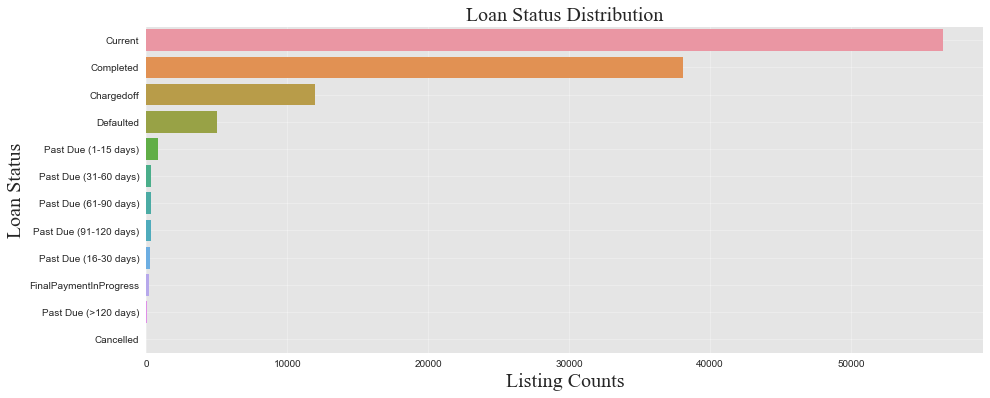

In [95]:
Status = loan_df1[['LoanStatus','LoanStatus_New']]
Status= Status.dropna()
status_order = Status.LoanStatus.value_counts().index
plt.figure(figsize = (15,6))
sb.countplot(data = Status, y ='LoanStatus',order = status_order)
plt.ylabel('Loan Status',font2)
plt.xlabel('Listing Counts',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Loan Status Distribution',font2)
plt.show();

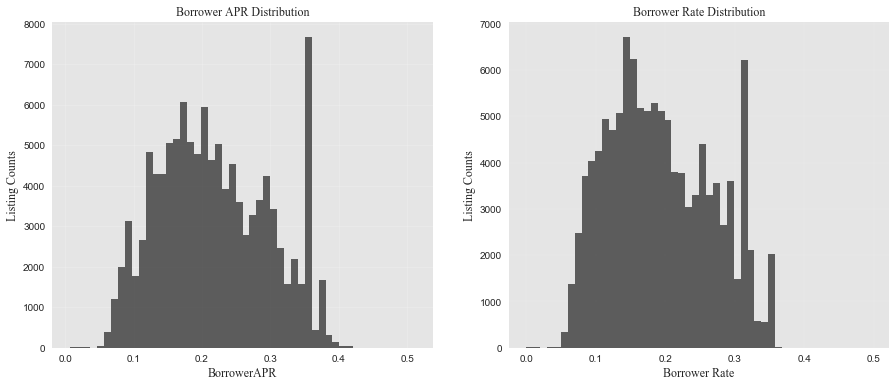

In [96]:
Rate_df = loan_df1[['BorrowerAPR','BorrowerRate','Term','LoanOriginalAmount','MonthlyLoanPayment','LoanStatus','Loan_Date','Stage']]
Rate_df = Rate_df.dropna()
plt.figure(figsize=(15,6))
font3={'family':'Times New Roman',
      'weight':'normal',
      'size':12}
plt.subplot(1,2,1)
plt.hist(Rate_df['BorrowerAPR'],bins = 50, color = 'k',alpha = 0.6)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
plt.title('Borrower APR Distribution',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")
ax.patch.set_alpha(0.2) 
plt.xlabel('BorrowerAPR',font3)
plt.ylabel('Listing Counts',font3)
plt.subplot(1,2,2)
plt.grid(True,linewidth=0.3,alpha=0.3,color = 'white')
plt.hist(Rate_df['BorrowerRate'],bins = 50, color = 'k',alpha = 0.6)
plt.title('Borrower Rate Distribution',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")
ax.patch.set_alpha(0.2) 
plt.xlabel('Borrower Rate',font3)
plt.ylabel('Listing Counts',font3)
plt.show();

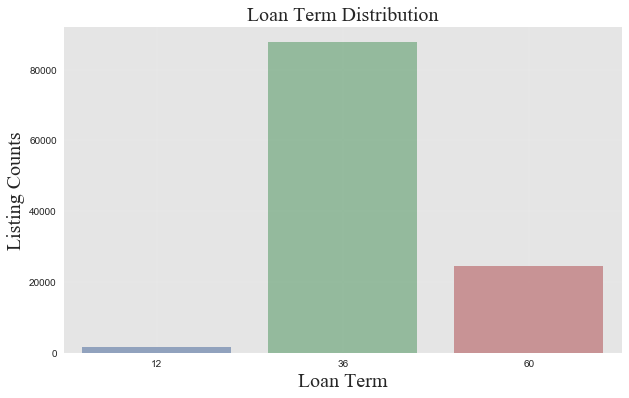

In [97]:
plt.figure(figsize=(10,6))
sb.countplot(data = Rate_df,x = 'Term',alpha = 0.6)
plt.xlabel('Loan Term',font2)
plt.ylabel('Listing Counts',font2)
plt.grid(True,linewidth=0.2,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Loan Term Distribution',font2)
plt.show();

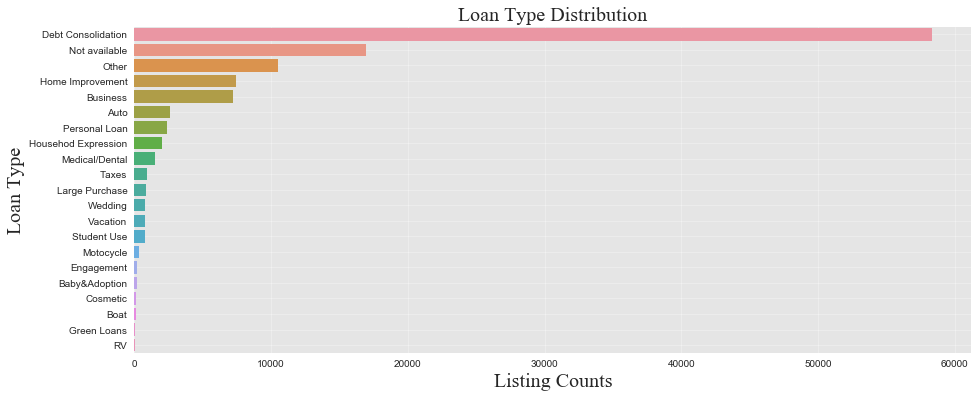

In [98]:
LoanCate = loan_df1[['loantype']]
LoanCate = LoanCate.dropna()
type_order = LoanCate.loantype.value_counts().index
plt.figure(figsize = (15,6))
sb.countplot(data = LoanCate, y ='loantype',order = type_order)
plt.ylabel('Loan Type',font2)
plt.xlabel('Listing Counts',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Loan Type Distribution',font2)
plt.show();

In [99]:
loan_df1.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,...,CurrentCreditLines,LP_InterestandFees,LP_ServiceFees,CurrentCreditLines,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,BankcardUtilization,AvailableBankcardCredit,TotalProsperLoans
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,113346.000000,113346.000000,1.139370e+05,113937.000000,113937.00000,...,106333.000000,113937.000000,113937.000000,106333.000000,112947.000000,113240.000000,106333.000000,106333.000000,106393.000000,22085.000000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,685.567731,704.567731,5.608026e+03,272.475783,8337.01385,...,10.317192,1077.542901,-54.725641,10.317192,4.154984,0.312646,0.015094,0.561309,11210.225447,1.421100
std,10.436212,0.080364,0.074818,2.376501,3.996797,66.458275,66.458275,7.478497e+03,192.697812,6245.80058,...,5.457866,1183.414168,60.675425,5.457866,10.160216,0.727868,0.154092,0.317918,19818.361309,0.764042
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000e+00,0.000000,1000.00000,...,0.000000,-2.349900,-664.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,660.000000,679.000000,3.200333e+03,131.620000,4000.00000,...,7.000000,274.870000,-73.180000,7.000000,0.000000,0.000000,0.000000,0.310000,880.000000,1.000000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,680.000000,699.000000,4.666667e+03,217.740000,6500.00000,...,10.000000,700.840100,-34.440000,10.000000,0.000000,0.000000,0.000000,0.600000,4100.000000,1.000000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,720.000000,739.000000,6.825000e+03,371.580000,12000.00000,...,13.000000,1458.540000,-13.920000,13.000000,3.000000,0.000000,0.000000,0.840000,13180.000000,2.000000
max,60.000000,0.512290,0.497500,11.000000,20.000000,880.000000,899.000000,1.750003e+06,2251.510000,35000.00000,...,59.000000,15617.030000,32.060000,59.000000,99.000000,38.000000,20.000000,5.950000,646285.000000,8.000000


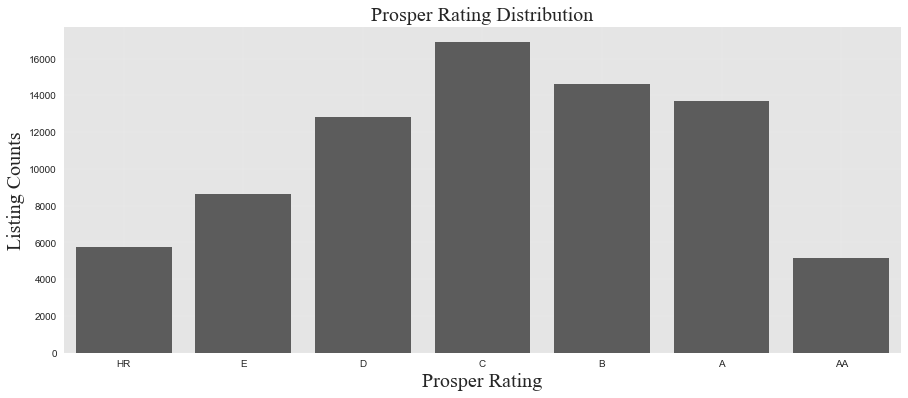

In [100]:
Prosper_df = loan_df1[['ProsperRating (Alpha)','ProsperScore','BorrowerAPR','LoanStatus','LoanStatus_New','Borrower','LoanOriginalAmount','Loan_Date','EmploymentStatus','MonthlyLoanPayment','CreditScoreRangeLower',
                       'CreditScoreRangeUpper','StatedMonthlyIncome','DelinquenciesLast7Years','PublicRecordsLast10Years','Term','loantype','DebtToIncomeRatio','AvailableBankcardCredit']]
Prosper_df = Prosper_df.dropna()
Prosper_order = ['HR','E','D','C','B','A','AA']
proper_var = pd.api.types.CategoricalDtype(ordered = True, categories = Prosper_order)
Prosper_df['ProsperRating (Alpha)']=Prosper_df['ProsperRating (Alpha)'].astype(proper_var)
prosper_value = Prosper_df.groupby('ProsperRating (Alpha)').sum().reset_index()
plt.figure(figsize = (15,6))
sb.countplot(data = Prosper_df, x ='ProsperRating (Alpha)',color = 'k', alpha = 0.6)
plt.xlabel('Prosper Rating',font2)
plt.ylabel('Listing Counts',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=0.2,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Prosper Rating Distribution',font2)
plt.show();

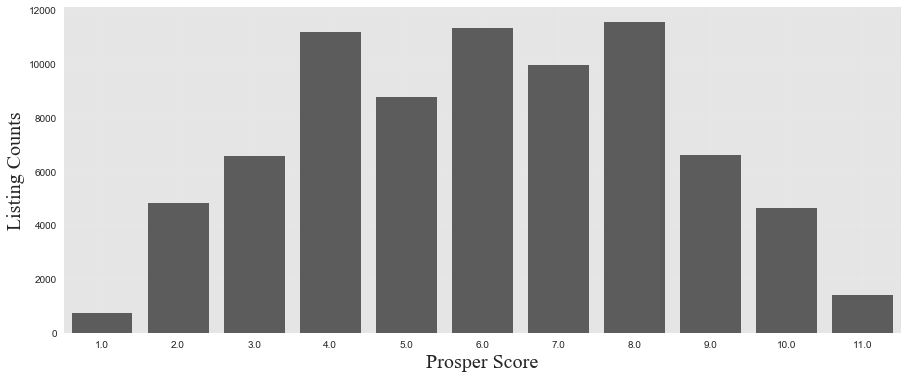

In [101]:
plt.figure(figsize = (15,6))
sb.countplot(Prosper_df['ProsperScore'], color = 'k', alpha = 0.6)
plt.xlabel('Prosper Score',font2)
plt.ylabel('Listing Counts',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=0.2,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

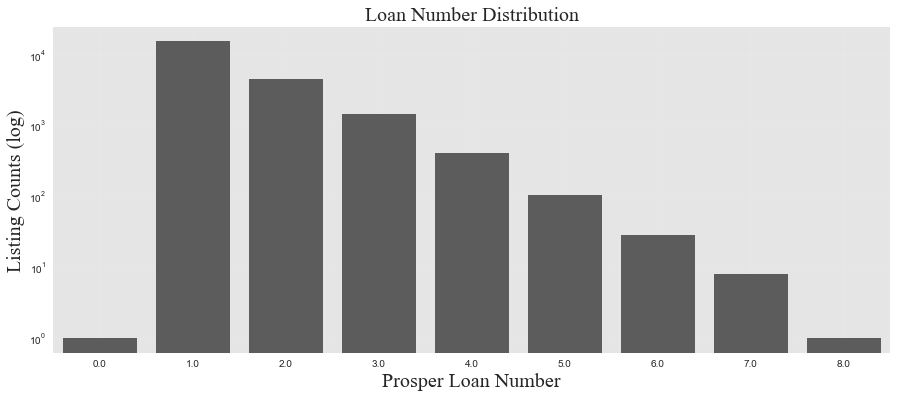

In [102]:
loan_num = loan_df1[['TotalProsperLoans','Borrower']]
loan_num = loan_num.dropna()
plt.figure(figsize = (15,6))
sb.countplot(loan_num['TotalProsperLoans'], color = 'k', alpha = 0.6)
plt.xlabel('Prosper Loan Number',font2)
plt.ylabel('Listing Counts (log)',font2)
plt.yscale('log')
plt.tick_params(font1)
plt.grid(True,linewidth=0.2,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title ('Loan Number Distribution',font2)
plt.show();

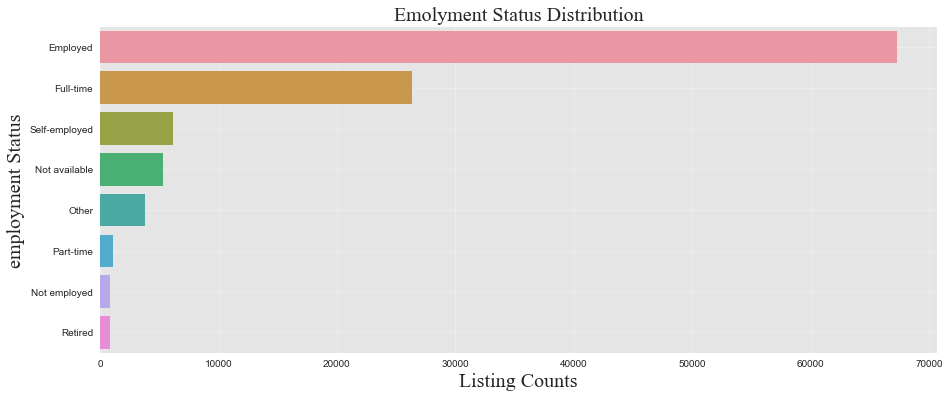

In [103]:
employ_df = loan_df1[['EmploymentStatus','StatedMonthlyIncome','DelinquenciesLast7Years','PublicRecordsLast10Years','BorrowerAPR','LoanStatus','Term','MonthlyLoanPayment']]
employ_df=employ_df.dropna()
employ_order = employ_df.EmploymentStatus.value_counts().index
plt.figure(figsize = (15,6))
sb.countplot(data = employ_df, y ='EmploymentStatus',order = employ_order)
plt.ylabel('employment Status',font2)
plt.xlabel('Listing Counts',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Emolyment Status Distribution',font2)
plt.show();

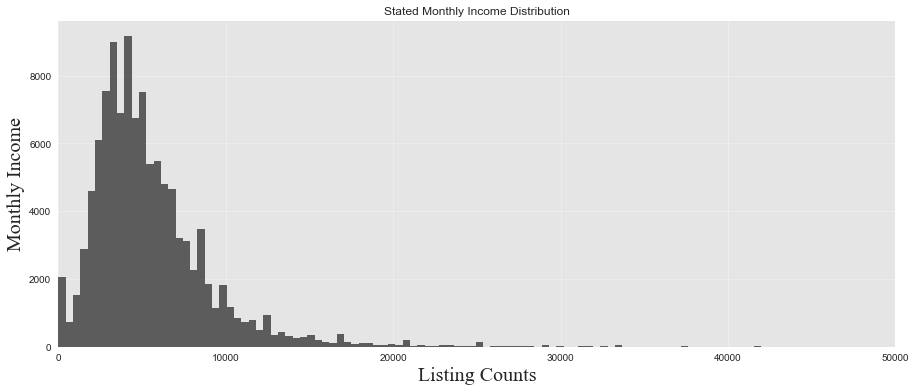

In [104]:
plt.figure(figsize = (15,6))
plt.hist(employ_df['StatedMonthlyIncome'],bins = 4000, color = 'k', alpha = 0.6)
plt.xlim(0,50000)
plt.ylabel('Monthly Income',font2)
plt.xlabel('Listing Counts',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.title('Stated Monthly Income Distribution')
plt.show();

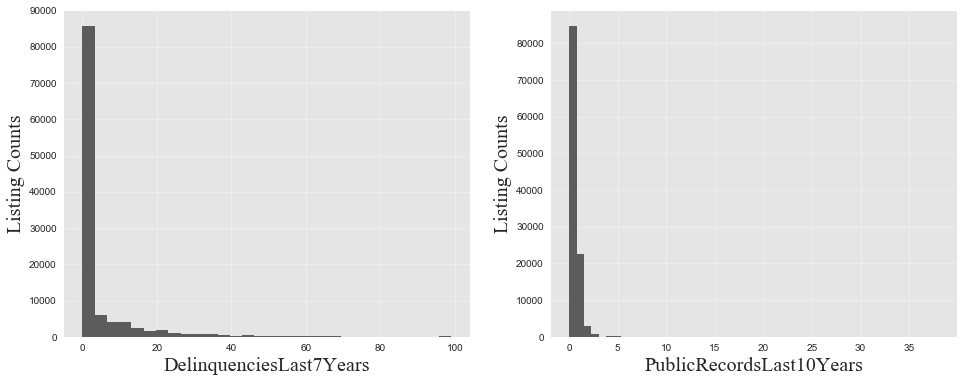

In [105]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(employ_df['DelinquenciesLast7Years'],bins = 30,color = 'k',alpha = 0.6)
plt.ylabel('Listing Counts',font2)
plt.xlabel('DelinquenciesLast7Years',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.subplot(1,2,2)
plt.hist(employ_df['PublicRecordsLast10Years'],bins = 50,color = 'k',alpha = 0.6)
plt.ylabel('Listing Counts',font2)
plt.xlabel('PublicRecordsLast10Years',font2)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

## Multivariate analysis

In [106]:
stage_df = loan_df1[['Stage','Borrower','Loan_Date','BorrowerAPR','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper',
                    'LoanStatus','LoanStatus_New','MonthlyLoanPayment']]
stage_df = stage_df.dropna()
stage_df.head()

,Stage,Borrower,Loan_Date,BorrowerAPR,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,LoanStatus,LoanStatus_New,MonthlyLoanPayment
0,Before July 2009,New borrower,Sept 2007,0.16516,9425,640.0,659.0,Completed,Normal,330.43
1,After July 2009,New borrower,Mar 2014,0.12016,10000,680.0,699.0,Current,Normal,318.93
2,Before July 2009,New borrower,Jan 2007,0.28269,3001,480.0,499.0,Completed,Normal,123.32
3,After July 2009,New borrower,Nov 2012,0.12528,10000,800.0,819.0,Current,Normal,321.45
4,After July 2009,Old borrower,Sept 2013,0.24614,15000,680.0,699.0,Current,Normal,563.97


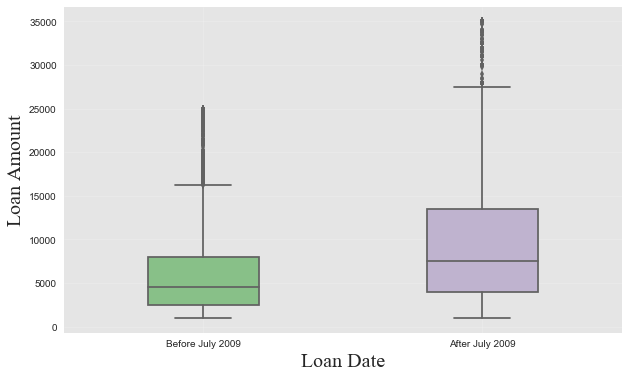

In [107]:
plt.figure(figsize = (10,6))
sb.boxplot(data = stage_df,x='Stage', y = 'LoanOriginalAmount',palette = 'Accent',width = 0.4)
plt.xlabel('Loan Date',font2)
plt.ylabel('Loan Amount',font2)
plt.tick_params(font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

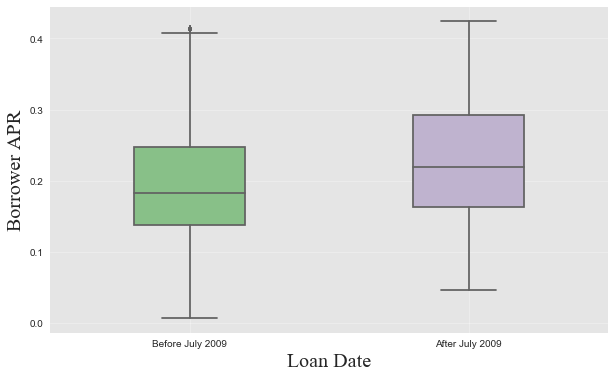

In [108]:
plt.figure(figsize = (10,6))
sb.boxplot(data = stage_df,x='Stage', y = 'BorrowerAPR',palette = 'Accent',width = 0.4)
plt.xlabel('Loan Date',font2)
plt.ylabel('Borrower APR',font2)
plt.tick_params(font2)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

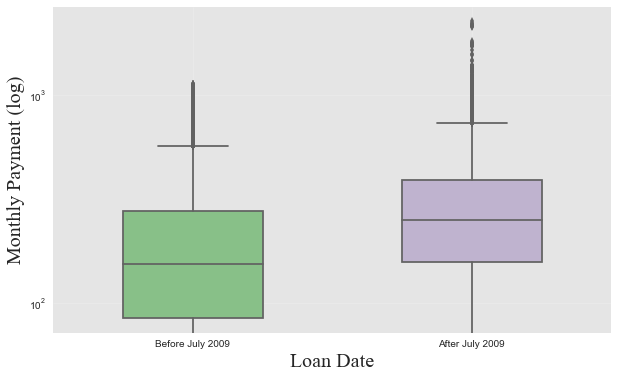

In [109]:
plt.figure(figsize = (10,6))
sb.boxplot(data = stage_df,x = 'Stage',y='MonthlyLoanPayment',palette = 'Accent', width = 0.5)
plt.xlabel('Loan Date',font2)
plt.ylabel('Monthly Payment (log)',font2)
plt.yscale('log')
plt.tick_params(font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

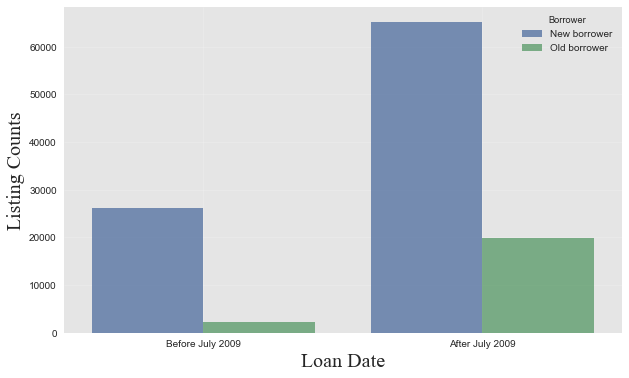

In [110]:
plt.figure(figsize = (10,6))
sb.countplot(data = stage_df,x='Stage', hue = 'Borrower',alpha = 0.8)
plt.xlabel('Loan Date',font2)
plt.ylabel('Listing Counts',font2)
plt.tick_params(font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

In [111]:
def score(a,b):
    credit = int((a+b)/2)
    return credit
stage_df['CreditScore']=stage_df.apply(lambda x: score(x.CreditScoreRangeLower,x.CreditScoreRangeUpper),axis =1)

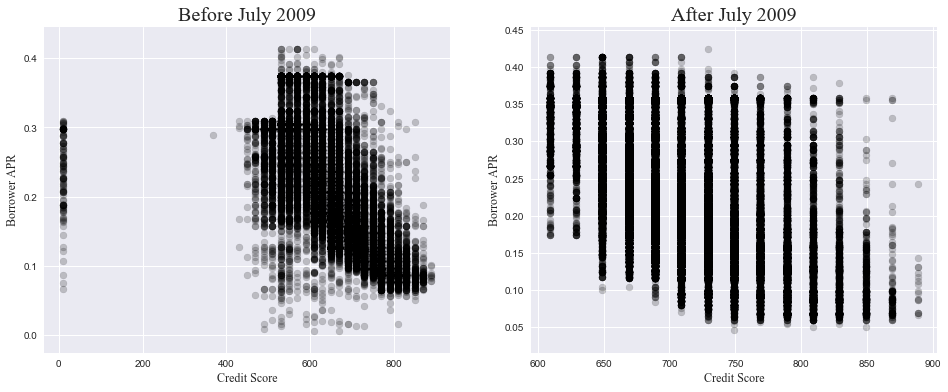

In [112]:
plt.figure(figsize=(16,6))
Before = stage_df[stage_df.Stage == 'Before July 2009']
After = stage_df[stage_df.Stage == 'After July 2009']
plt.subplot(1,2,1)
plt.scatter(x = Before.CreditScore, y = Before.BorrowerAPR,color = 'k',alpha = 0.2)
plt.xlabel('Credit Score',font3)
plt.ylabel('Borrower APR',font3)
plt.tick_params(font2)
plt.title('Before July 2009',font2)
plt.subplot(1,2,2)
plt.scatter(x = After.CreditScore, y = After.BorrowerAPR,color = 'k',alpha = 0.2)
plt.xlabel('Credit Score',font3)
plt.ylabel('Borrower APR',font3)
plt.tick_params(font2)
plt.title('After July 2009',font2);

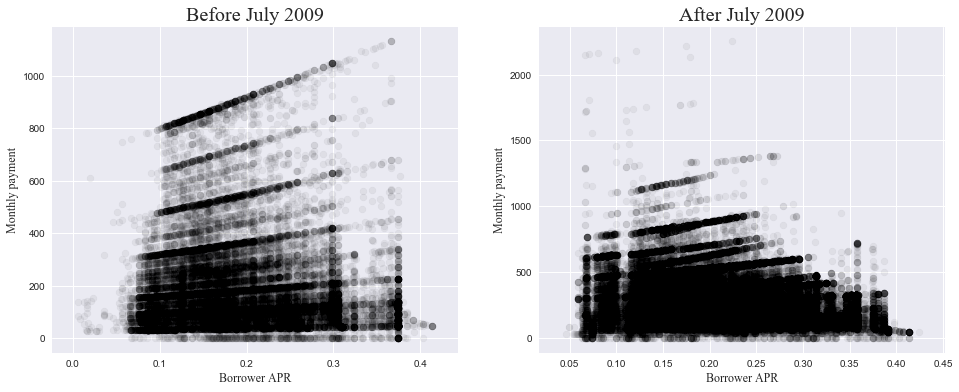

In [113]:
plt.figure(figsize=(16,6))
Before = stage_df[stage_df.Stage == 'Before July 2009']
After = stage_df[stage_df.Stage == 'After July 2009']
plt.subplot(1,2,1)
plt.scatter(y = Before.MonthlyLoanPayment, x = Before.BorrowerAPR,color = 'k',alpha = 0.05)
plt.xlabel('Borrower APR',font3)
plt.ylabel('Monthly payment',font3)
plt.tick_params(font2)
plt.title('Before July 2009',font2)
plt.subplot(1,2,2)
plt.scatter(y = After.MonthlyLoanPayment, x = After.BorrowerAPR,color = 'k',alpha = 0.05)
plt.xlabel('Borrower APR',font3)
plt.ylabel('Monthly payment',font3)
plt.tick_params(font2)
plt.title('After July 2009',font2);

In [114]:
Prosper_df['CreditScore']=Prosper_df.apply(lambda x: score(x.CreditScoreRangeLower,x.CreditScoreRangeUpper),axis =1)
Prosper_df.head()

,ProsperRating (Alpha),ProsperScore,BorrowerAPR,LoanStatus,LoanStatus_New,Borrower,LoanOriginalAmount,Loan_Date,EmploymentStatus,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,DelinquenciesLast7Years,PublicRecordsLast10Years,Term,loantype,DebtToIncomeRatio,AvailableBankcardCredit,CreditScore
1,A,7.0,0.12016,Current,Normal,New borrower,10000,Mar 2014,Employed,318.93,680.0,699.0,6125.000000,0.0,1.0,36,Home Improvement,0.18,10266.0,689
3,A,9.0,0.12528,Current,Normal,New borrower,10000,Nov 2012,Employed,321.45,800.0,819.0,2875.000000,14.0,0.0,36,Motocycle,0.15,30754.0,809
4,D,4.0,0.24614,Current,Normal,Old borrower,15000,Sept 2013,Employed,563.97,680.0,699.0,9583.333333,0.0,0.0,36,Home Improvement,0.26,695.0,689
5,B,10.0,0.15425,Current,Normal,New borrower,15000,Dec 2013,Employed,342.37,740.0,759.0,8333.333333,0.0,0.0,60,Debt Consolidation,0.36,86509.0,749
6,E,2.0,0.31032,Current,Normal,New borrower,3000,Apr 2013,Employed,122.67,680.0,699.0,2083.333333,0.0,0.0,36,Debt Consolidation,0.27,1929.0,689


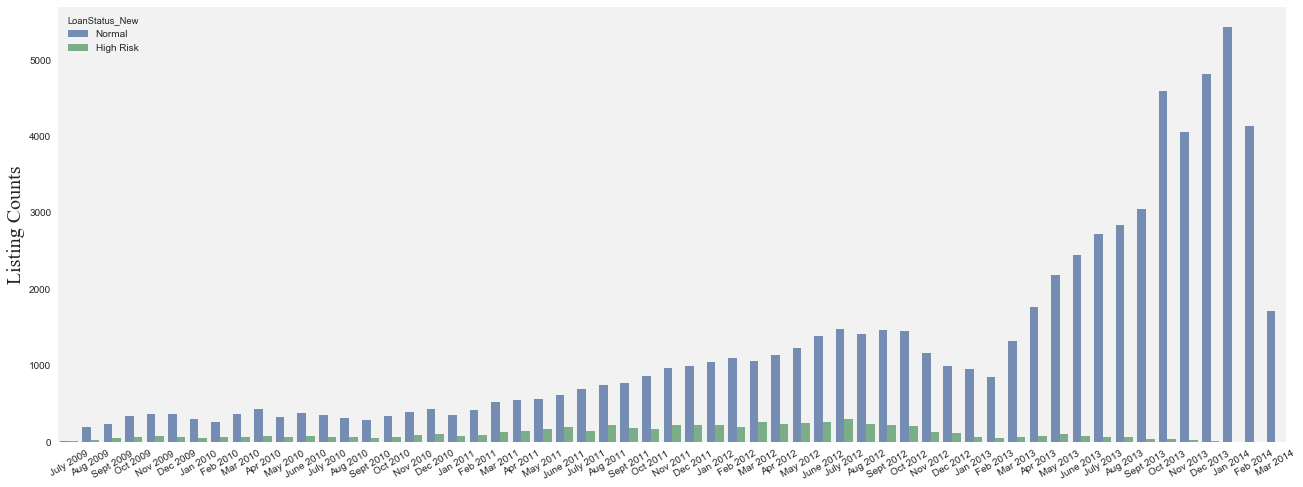

In [115]:
date1_order = ['July 2009','Aug 2009','Sept 2009','Oct 2009','Nov 2009','Dec 2009','Jan 2010','Feb 2010','Mar 2010','Apr 2010','May 2010','June 2010','July 2010',
              'Aug 2010','Sept 2010','Oct 2010','Nov 2010','Dec 2010','Jan 2011','Feb 2011','Mar 2011','Apr 2011','May 2011','June 2011','July 2011',
              'Aug 2011','Sept 2011','Oct 2011','Nov 2011','Dec 2011','Jan 2012','Feb 2012','Mar 2012','Apr 2012','May 2012','June 2012','July 2012',
              'Aug 2012','Sept 2012','Oct 2012','Nov 2012','Dec 2012','Jan 2013','Feb 2013','Mar 2013','Apr 2013','May 2013','June 2013','July 2013',
              'Aug 2013','Sept 2013','Oct 2013','Nov 2013','Dec 2013','Jan 2014','Feb 2014','Mar 2014']
plt.figure(figsize=(22,8))
sb.countplot(data = Prosper_df,x = 'Loan_Date', hue = 'LoanStatus_New',order = date1_order,alpha = 0.8)
plt.xlabel('')
plt.ylabel('Listing Counts',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.xticks(rotation = 30)
plt.show();

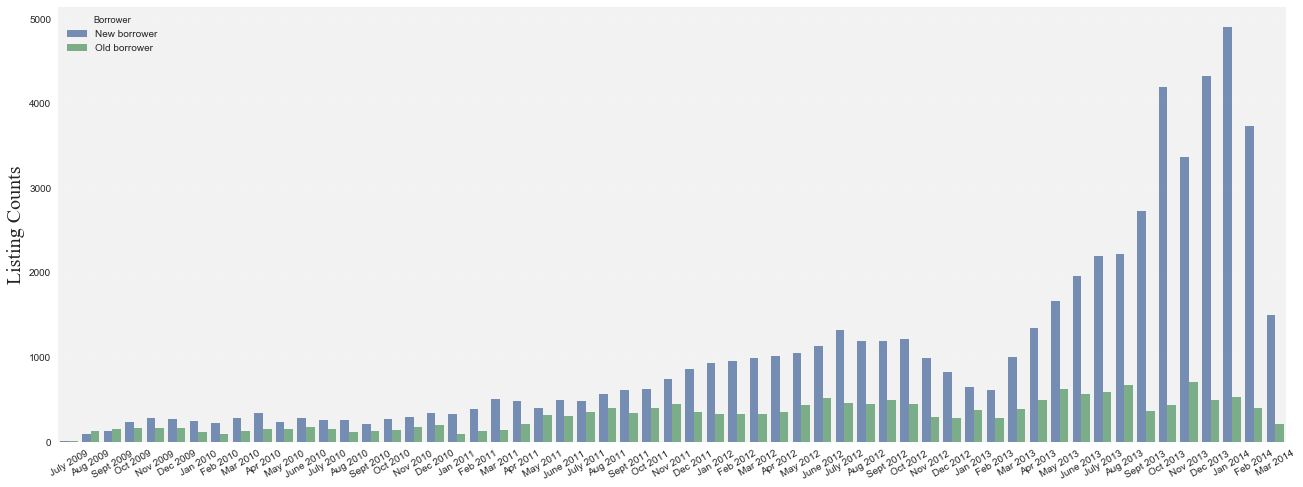

In [116]:
plt.figure(figsize=(22,8))
sb.countplot(data = Prosper_df,x = 'Loan_Date', hue = 'Borrower',order = date1_order,alpha = 0.8)
plt.xlabel('')
plt.ylabel('Listing Counts',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.xticks(rotation = 30)
plt.show();

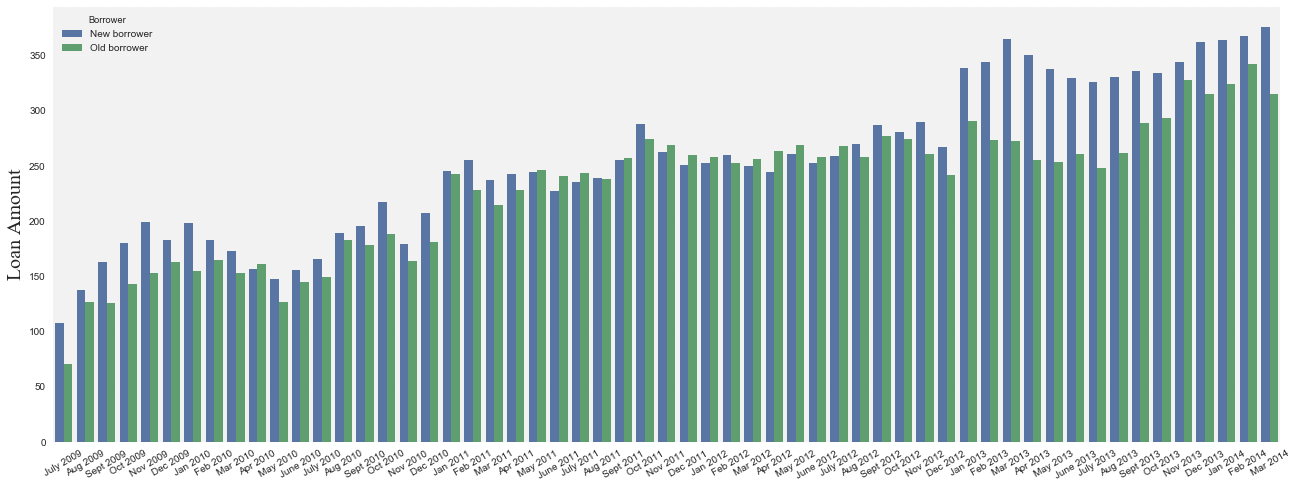

In [117]:
plt.figure(figsize=(22,8))
sb.barplot(data = Prosper_df,x = 'Loan_Date',y = 'MonthlyLoanPayment', hue = 'Borrower',order = date1_order,ci = 0)
plt.ylabel('Loan Amount',font2)
plt.xlabel('')
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.xticks(rotation = 30)
plt.show();

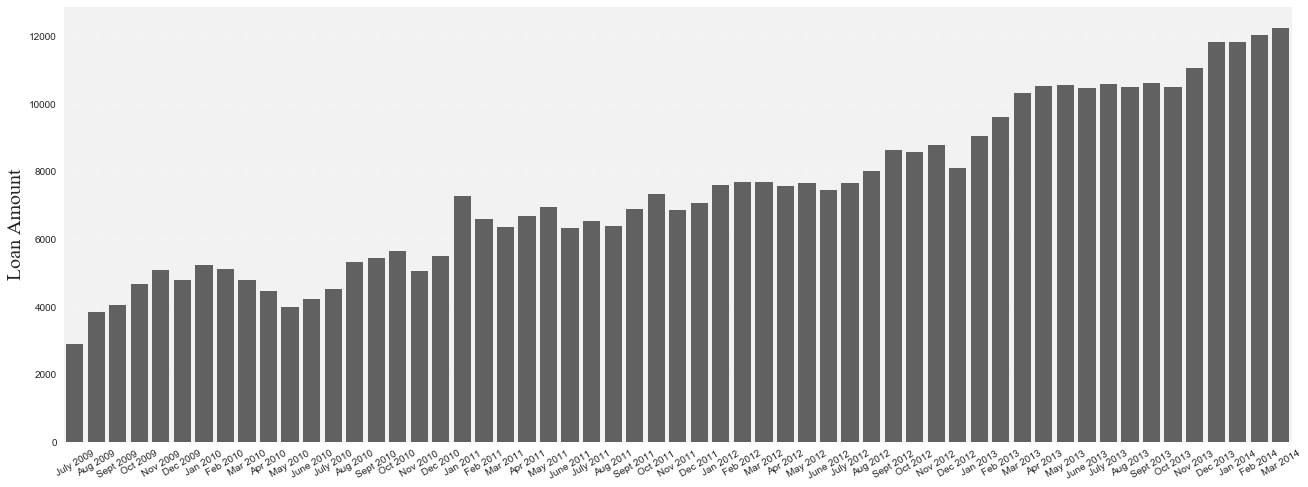

In [118]:
plt.figure(figsize=(22,8))
sb.barplot(data = Prosper_df,x = 'Loan_Date',y = 'LoanOriginalAmount', order = date1_order,color = 'k', alpha = 0.6,ci = 0)
plt.ylabel('Loan Amount',font2)
plt.xlabel('')
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.xticks(rotation = 30)
plt.show();

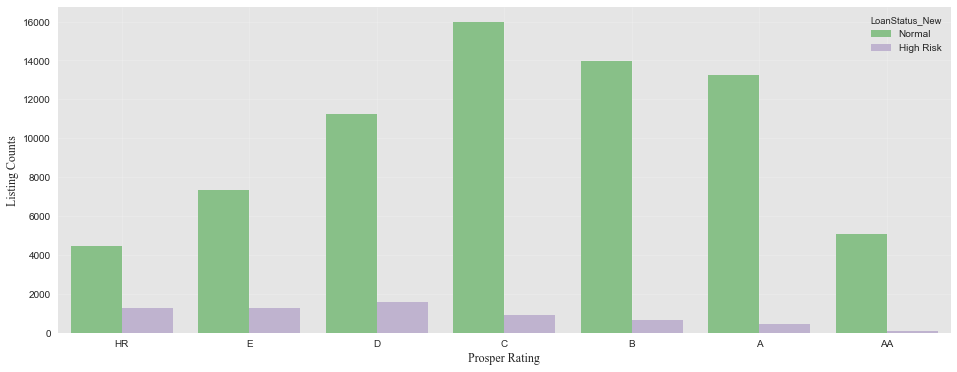

In [119]:
plt.figure(figsize=(16,6))
sb.countplot(data = Prosper_df,x = 'ProsperRating (Alpha)', hue = 'LoanStatus_New',palette = 'Accent')
plt.xlabel('Prosper Rating',font3)
plt.ylabel('Listing Counts',font3)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.2) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

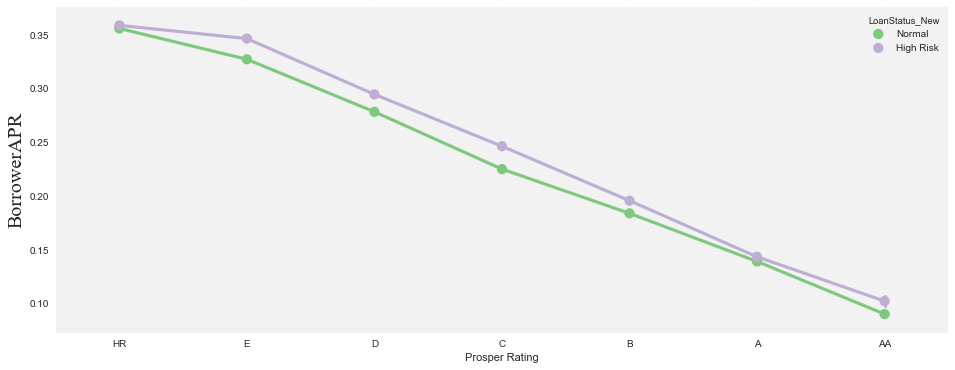

In [120]:
plt.figure(figsize=(16,6))
sb.pointplot(data = Prosper_df,x = 'ProsperRating (Alpha)',y = 'BorrowerAPR', hue = 'LoanStatus_New',palette = 'Accent',alpha = 0.8)
plt.xlabel('Prosper Rating')
plt.ylabel('BorrowerAPR',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

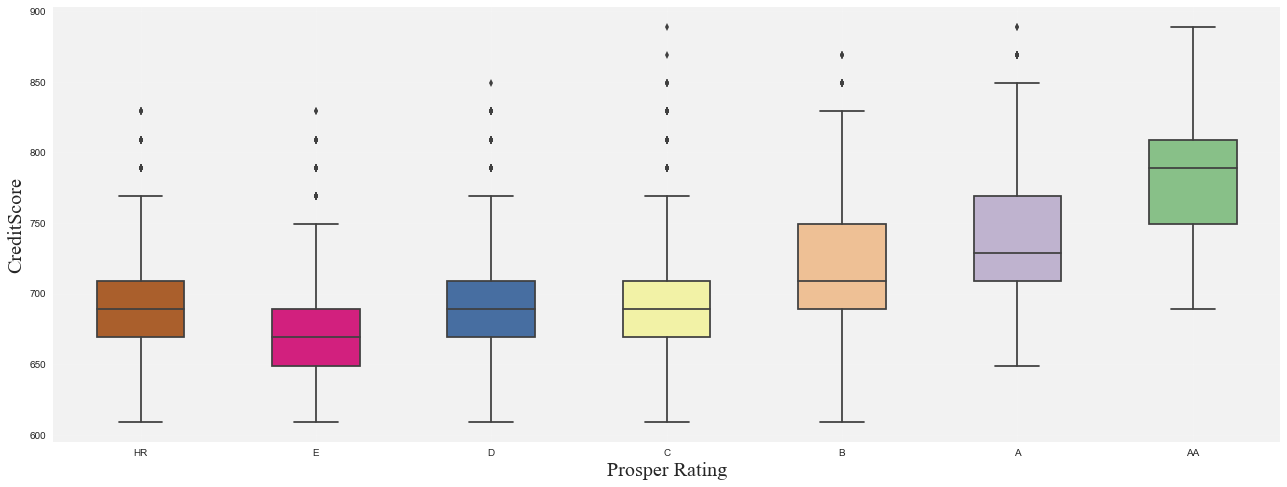

In [121]:
plt.figure(figsize=(22,8))
sb.boxplot(data = Prosper_df,x = 'ProsperRating (Alpha)',y = 'CreditScore', palette = 'Accent_r',width = 0.5)
plt.ylabel('CreditScore',font2)
plt.xlabel('Prosper Rating',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

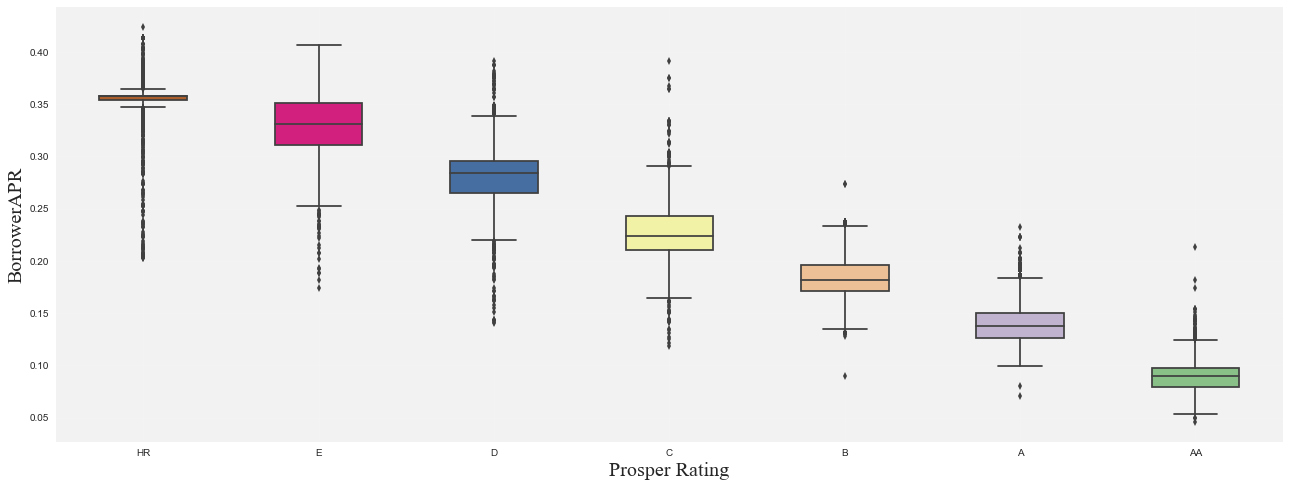

In [122]:
plt.figure(figsize=(22,8))
sb.boxplot(data = Prosper_df,x = 'ProsperRating (Alpha)',y = 'BorrowerAPR', palette = 'Accent_r',width = 0.5)
plt.ylabel('BorrowerAPR',font2)
plt.xlabel('Prosper Rating',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

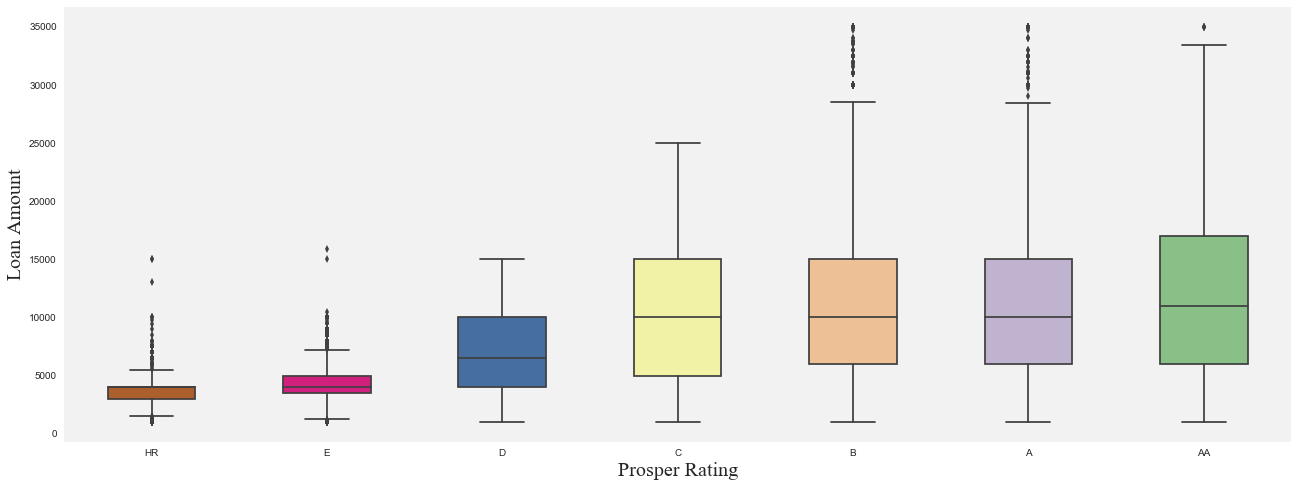

In [123]:
plt.figure(figsize=(22,8))
sb.boxplot(data = Prosper_df,x = 'ProsperRating (Alpha)',y = 'LoanOriginalAmount', palette = 'Accent_r',width = 0.5)
plt.ylabel('Loan Amount',font2)
plt.xlabel('Prosper Rating',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();


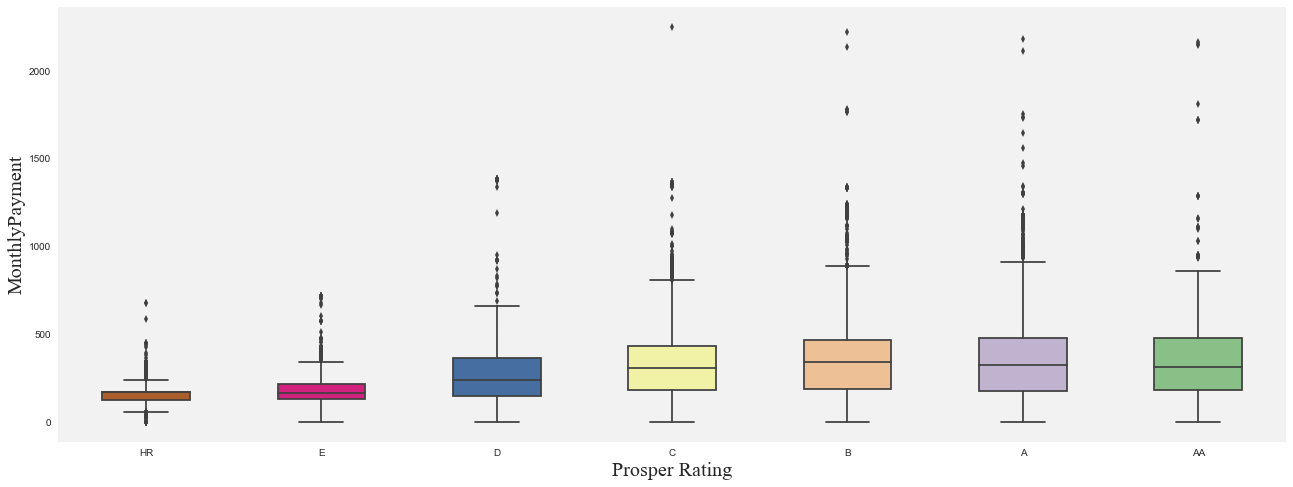

In [124]:
plt.figure(figsize=(22,8))
sb.boxplot(data = Prosper_df,x = 'ProsperRating (Alpha)',y = 'MonthlyLoanPayment', palette = 'Accent_r',width = 0.5)
plt.ylabel('MonthlyPayment',font2)
plt.xlabel('Prosper Rating',font2)
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

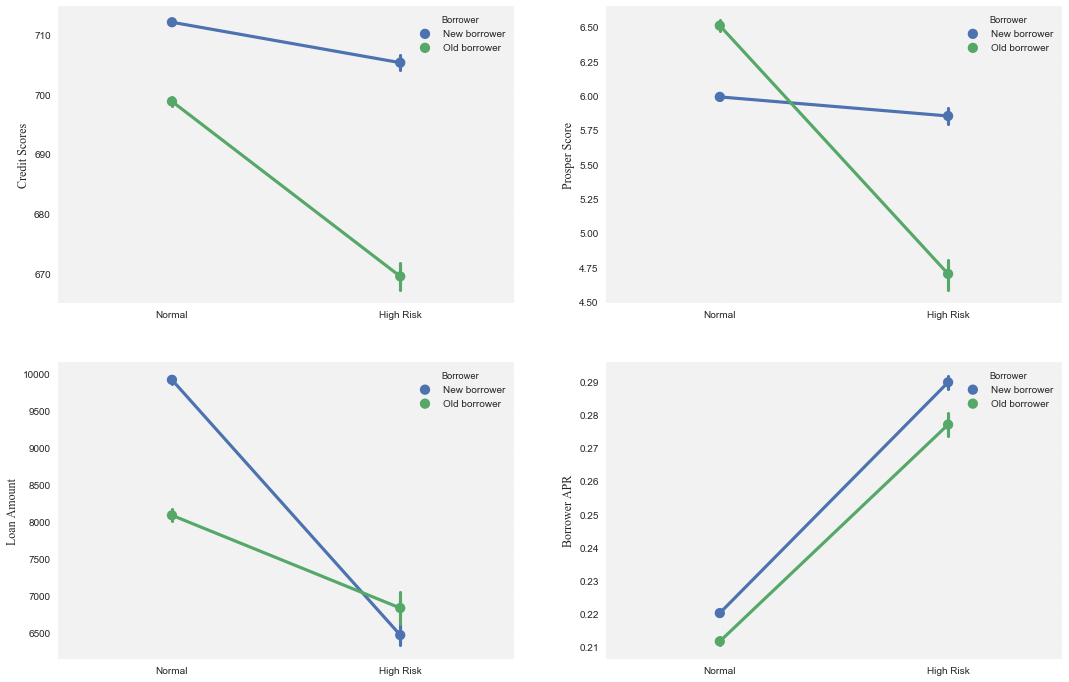

In [125]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sb.pointplot(data = Prosper_df,x = 'LoanStatus_New',y = 'CreditScore', hue = 'Borrower')
plt.ylabel('Credit Scores',font3)
plt.xlabel("")
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.subplot(2,2,2)
sb.pointplot(data = Prosper_df,x = 'LoanStatus_New',y = 'ProsperScore', hue = 'Borrower')
plt.ylabel('Prosper Score',font3)
plt.xlabel("")
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.subplot(2,2,3)
sb.pointplot(data = Prosper_df,x = 'LoanStatus_New',y = 'LoanOriginalAmount', hue = 'Borrower')
plt.ylabel('Loan Amount',font3)
plt.xlabel("")
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.subplot(2,2,4)
sb.pointplot(data = Prosper_df,x = 'LoanStatus_New',y = 'BorrowerAPR', hue = 'Borrower')
plt.ylabel('Borrower APR',font3)
plt.xlabel("")
plt.grid(True,linewidth=0.5,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)

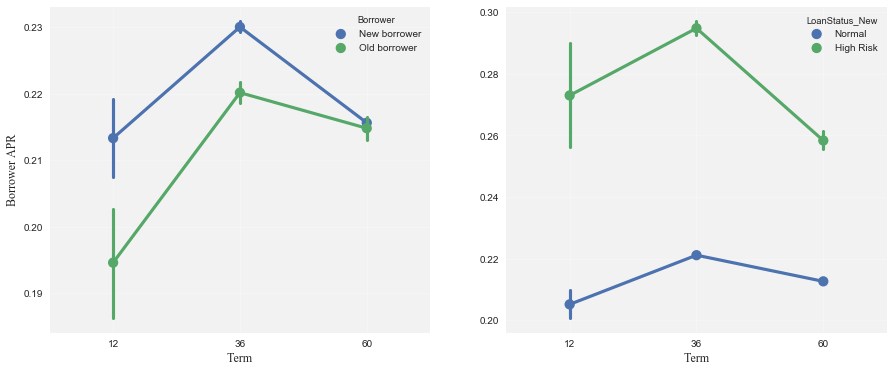

In [126]:
plt.figure(figsize=(15,6))
font3={'family':'Times New Roman',
      'weight':'normal',
      'size':12}
plt.subplot(1,2,1)
sb.pointplot(data = Prosper_df, x = 'Term', y = 'BorrowerAPR',hue = 'Borrower')
plt.ylabel('Borrower APR',font3)
plt.xlabel('Term',font3)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.subplot(1,2,2)
sb.pointplot(data = Prosper_df, x = 'Term', y = 'BorrowerAPR',hue = 'LoanStatus_New');
plt.ylabel('')
plt.xlabel('Term',font3)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

In [127]:
Prosper_df.describe()

,ProsperScore,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,DelinquenciesLast7Years,PublicRecordsLast10Years,Term,DebtToIncomeRatio,AvailableBankcardCredit,CreditScore
count,77557.000000,77557.00000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000
mean,6.061967,0.22373,9269.314208,295.754619,698.999446,717.999446,5963.503215,3.752595,0.286576,42.724035,0.258752,11146.585195,707.999446
std,2.362354,0.07916,6398.380615,189.327595,47.160646,47.160646,5082.144391,9.464378,0.640983,11.711915,0.318326,18227.218381,47.160646
min,1.000000,0.04583,1000.000000,0.000000,600.000000,619.000000,0.250000,0.000000,0.000000,12.000000,0.000000,0.000000,609.000000
25%,4.000000,0.16175,4000.000000,158.490000,660.000000,679.000000,3533.333333,0.000000,0.000000,36.000000,0.150000,1112.000000,669.000000
50%,6.000000,0.21566,8000.000000,256.390000,700.000000,719.000000,5000.000000,0.000000,0.000000,36.000000,0.220000,4473.000000,709.000000
75%,8.000000,0.28780,14500.000000,392.280000,720.000000,739.000000,7166.666667,2.000000,0.000000,60.000000,0.320000,13510.000000,729.000000
max,11.000000,0.42395,35000.000000,2251.510000,880.000000,899.000000,483333.333333,99.000000,38.000000,60.000000,10.010000,498374.000000,889.000000


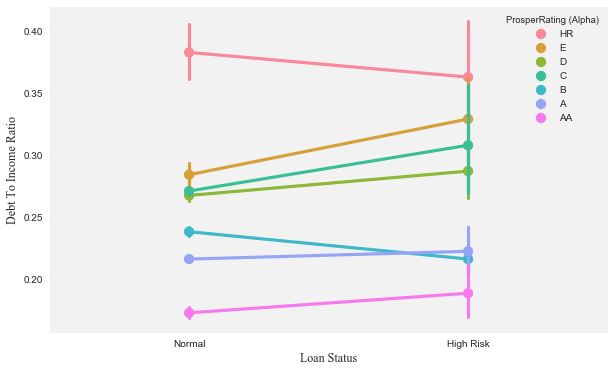

In [128]:
plt.figure(figsize=(10,6))
sb.pointplot(data = Prosper_df, x = 'LoanStatus_New', y = 'DebtToIncomeRatio',hue = 'ProsperRating (Alpha)');
plt.ylabel('Debt To Income Ratio',font3)
plt.xlabel('Loan Status',font3)
plt.tick_params(font1)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)
plt.show();

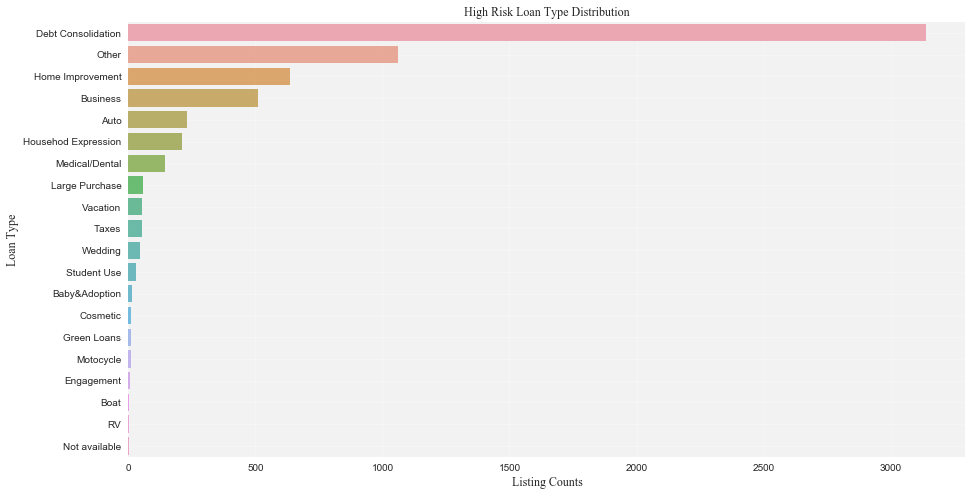

In [129]:
high_risk = Prosper_df[Prosper_df.LoanStatus_New == 'High Risk']
Normal = Prosper_df[Prosper_df.LoanStatus_New == 'Normal']
risk_order = high_risk.loantype.value_counts().index
plt.figure(figsize=(15,8))
sb.countplot(data = high_risk, y = 'loantype',alpha = 0.8,order = risk_order)
plt.ylabel('Loan Type',font3)
plt.xlabel('Listing Counts',font3)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
plt.title('High Risk Loan Type Distribution',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)

In [130]:
loan_df1.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,...,CurrentCreditLines,LP_InterestandFees,LP_ServiceFees,CurrentCreditLines,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,BankcardUtilization,AvailableBankcardCredit,TotalProsperLoans
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,113346.000000,113346.000000,1.139370e+05,113937.000000,113937.00000,...,106333.000000,113937.000000,113937.000000,106333.000000,112947.000000,113240.000000,106333.000000,106333.000000,106393.000000,22085.000000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,685.567731,704.567731,5.608026e+03,272.475783,8337.01385,...,10.317192,1077.542901,-54.725641,10.317192,4.154984,0.312646,0.015094,0.561309,11210.225447,1.421100
std,10.436212,0.080364,0.074818,2.376501,3.996797,66.458275,66.458275,7.478497e+03,192.697812,6245.80058,...,5.457866,1183.414168,60.675425,5.457866,10.160216,0.727868,0.154092,0.317918,19818.361309,0.764042
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000e+00,0.000000,1000.00000,...,0.000000,-2.349900,-664.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,660.000000,679.000000,3.200333e+03,131.620000,4000.00000,...,7.000000,274.870000,-73.180000,7.000000,0.000000,0.000000,0.000000,0.310000,880.000000,1.000000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,680.000000,699.000000,4.666667e+03,217.740000,6500.00000,...,10.000000,700.840100,-34.440000,10.000000,0.000000,0.000000,0.000000,0.600000,4100.000000,1.000000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,720.000000,739.000000,6.825000e+03,371.580000,12000.00000,...,13.000000,1458.540000,-13.920000,13.000000,3.000000,0.000000,0.000000,0.840000,13180.000000,2.000000
max,60.000000,0.512290,0.497500,11.000000,20.000000,880.000000,899.000000,1.750003e+06,2251.510000,35000.00000,...,59.000000,15617.030000,32.060000,59.000000,99.000000,38.000000,20.000000,5.950000,646285.000000,8.000000


In [131]:
Prosper_df.describe()

,ProsperScore,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,DelinquenciesLast7Years,PublicRecordsLast10Years,Term,DebtToIncomeRatio,AvailableBankcardCredit,CreditScore
count,77557.000000,77557.00000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000
mean,6.061967,0.22373,9269.314208,295.754619,698.999446,717.999446,5963.503215,3.752595,0.286576,42.724035,0.258752,11146.585195,707.999446
std,2.362354,0.07916,6398.380615,189.327595,47.160646,47.160646,5082.144391,9.464378,0.640983,11.711915,0.318326,18227.218381,47.160646
min,1.000000,0.04583,1000.000000,0.000000,600.000000,619.000000,0.250000,0.000000,0.000000,12.000000,0.000000,0.000000,609.000000
25%,4.000000,0.16175,4000.000000,158.490000,660.000000,679.000000,3533.333333,0.000000,0.000000,36.000000,0.150000,1112.000000,669.000000
50%,6.000000,0.21566,8000.000000,256.390000,700.000000,719.000000,5000.000000,0.000000,0.000000,36.000000,0.220000,4473.000000,709.000000
75%,8.000000,0.28780,14500.000000,392.280000,720.000000,739.000000,7166.666667,2.000000,0.000000,60.000000,0.320000,13510.000000,729.000000
max,11.000000,0.42395,35000.000000,2251.510000,880.000000,899.000000,483333.333333,99.000000,38.000000,60.000000,10.010000,498374.000000,889.000000


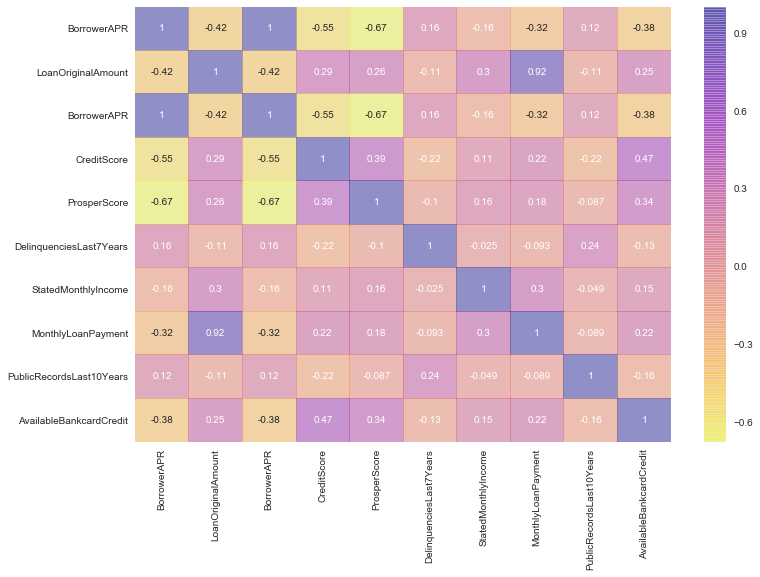

In [132]:
corr_df = Prosper_df[['BorrowerAPR','LoanOriginalAmount','BorrowerAPR','CreditScore','ProsperScore','DelinquenciesLast7Years',
                     'StatedMonthlyIncome','MonthlyLoanPayment','PublicRecordsLast10Years','AvailableBankcardCredit']]
plt.figure(figsize=(12,8))
sb.heatmap(corr_df.corr(),cmap= 'plasma_r',alpha = 0.4,annot = True);

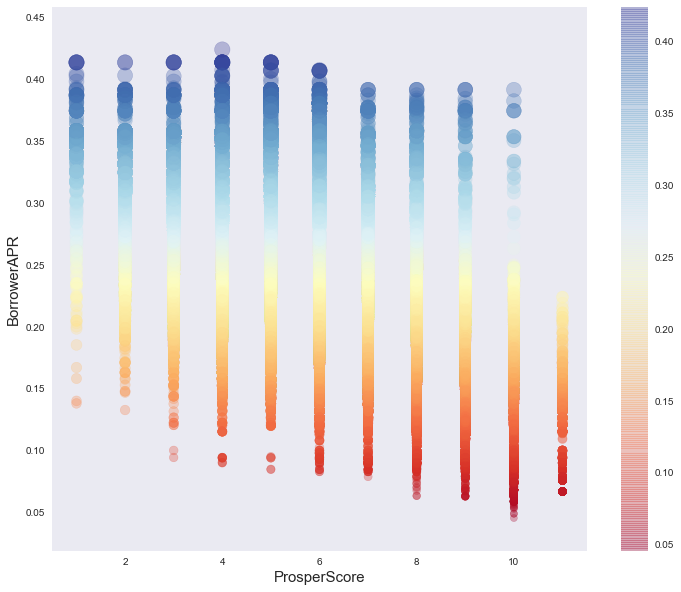

In [133]:
sb.set(style = "darkgrid")
x = Prosper_df.ProsperScore
y = Prosper_df.BorrowerAPR
z = Prosper_df.BorrowerAPR
cm = plt.cm.get_cmap('RdYlBu')
fig,ax = plt.subplots(figsize = (12,10))
bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) * 500, c = z, cmap = cm, linewidth = 0.5, alpha = 0.3)
ax.grid()
fig.colorbar(bubble)
ax.set_xlabel('ProsperScore', fontsize = 15)#X轴标签
ax.set_ylabel('BorrowerAPR', fontsize = 15)#Y轴标签
plt.show()

#### 2.3 The distribution of loan amount in different Prosper Rating range.

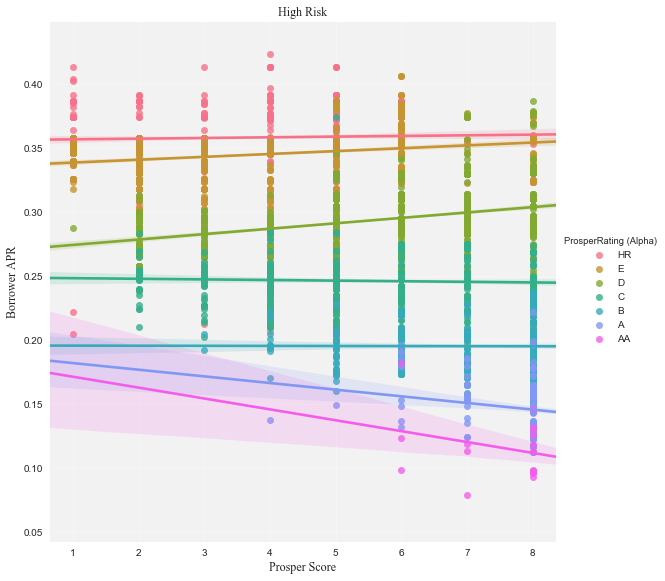

In [134]:
g = sb.FacetGrid(data = high_risk, hue = 'ProsperRating (Alpha)',hue_order = Prosper_order,size = 8)
g = g.map(sb.regplot, 'ProsperScore','BorrowerAPR').add_legend()
plt.ylabel('Borrower APR',font3)
plt.xlabel('Prosper Score',font3)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
plt.title('High Risk',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)

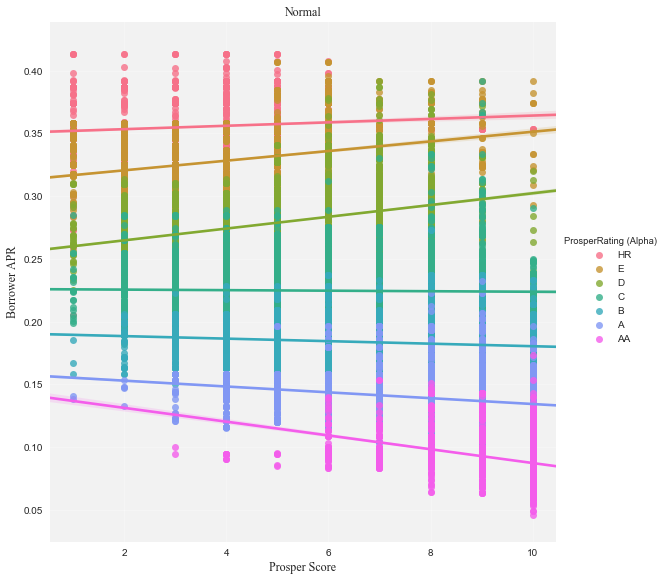

In [135]:
g = sb.FacetGrid(data = Normal, hue = 'ProsperRating (Alpha)',hue_order = Prosper_order,size = 8)
g = g.map(sb.regplot, 'ProsperScore','BorrowerAPR').add_legend()
plt.ylabel('Borrower APR',font3)
plt.xlabel('Prosper Score',font3)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
plt.title('Normal',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False)

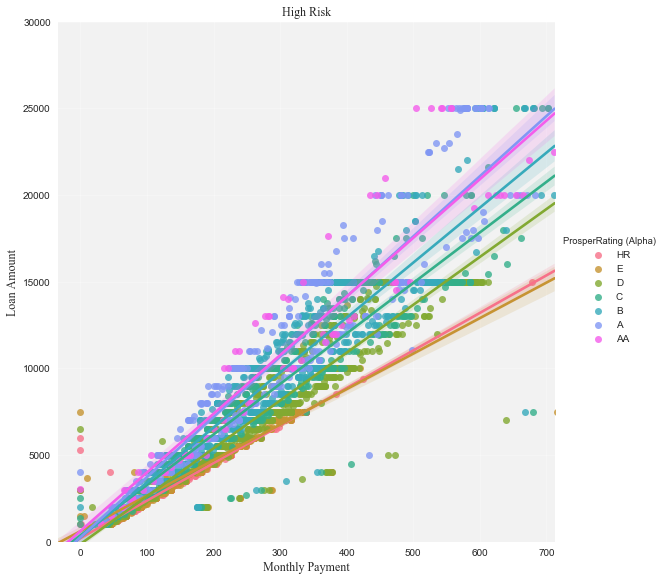

In [136]:
g = sb.FacetGrid(data = high_risk, hue = 'ProsperRating (Alpha)',hue_order = Prosper_order,size = 8)
g = g.map(sb.regplot, 'MonthlyLoanPayment','LoanOriginalAmount').add_legend()
plt.ylabel('Loan Amount',font3)
plt.ylim(0,30000)
plt.xlabel('Monthly Payment',font3)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
plt.title('High Risk',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False);

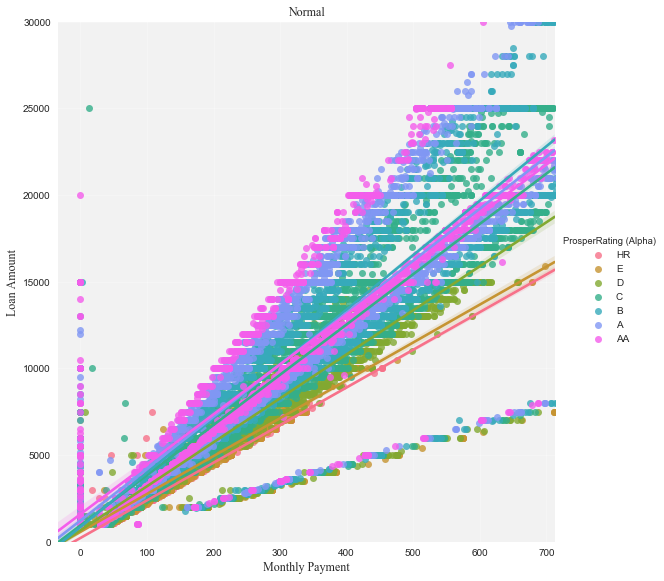

In [137]:
g = sb.FacetGrid(data = Normal, hue = 'ProsperRating (Alpha)',hue_order = Prosper_order,size = 8)
g = g.map(sb.regplot, 'MonthlyLoanPayment','LoanOriginalAmount').add_legend()
plt.ylabel('Loan Amount',font3)
plt.ylim(0,30000)
plt.xlabel('Monthly Payment',font3)
plt.grid(True,linewidth=1,alpha=0.3,color = 'white')
plt.title('Normal',font3)
ax=plt.gca()
ax.patch.set_facecolor("grey")                          
ax.patch.set_alpha(0.1) 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_visible(False);